In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import interp2d
import pickle

In [2]:
# np.random.seed(0)
N0_particle = 900
XP0 = np.random.uniform(-2, 2, N0_particle) 
YP0 = np.random.uniform(-2, 2, N0_particle)
St0 = 5


In [3]:
Bubbles_df_ini = np.zeros((N0_particle, 11), dtype=np.float64)

# first column is bubbles ID
Bubbles_df_ini[:, 0] = np.arange(N0_particle)

# second column is bubbles X position
Bubbles_df_ini[:, 1] = XP0.flatten().astype(float)

# third column is bubbles Y position   
Bubbles_df_ini[:, 2] = YP0.flatten().astype(float)

# fourth column is bubbles x-velocity
Bubbles_df_ini[:, 3] = np.zeros(N0_particle)

# fifth column is bubbles y-velocity
Bubbles_df_ini[:, 4] = np.zeros(N0_particle)

# sixth column is bubbles Stokes number
Bubbles_df_ini[:, 5] = St0

In [4]:
# from numbalsoda import lsoda_sig, lsoda
# import numba as nb
# from scipy.interpolate import interp2d
# import pickle

# R, gravity, Fr = 1.99, True, 5

# # with open('velocity_results/interp_functions_alpha04_2D.pkl', 'rb') as f:
# #     interp_Ux, interp_Uy, interp_dUxdx, interp_dUxdy, interp_dUydx, interp_dUydy = pickle.load(f)



# @nb.cfunc(lsoda_sig)

# def bilinear_interpolation(x, y, grid):
#     x0 = int(x-2)
#     x1 = x0 + 1
#     y0 = int(y-2)
#     y1 = y0 + 1

#     # # Check if the point lies within the grid
#     # if x0 < 0 or x1 >= grid.shape[1] or y0 < 0 or y1 >= grid.shape[0]:
#     #     return None

#     # Bilinear interpolation
#     f00 = grid[y0, x0]
#     f10 = grid[y0, x1]
#     f01 = grid[y1, x0]
#     f11 = grid[y1, x1]

#     dx = x - x0
#     dy = y - y0

#     interpolated_value = (f00 * (1 - dx) * (1 - dy) +
#                           f10 * dx * (1 - dy) +
#                           f01 * (1 - dx) * dy +
#                           f11 * dx * dy)

#     return interpolated_value

# def rhs(t, q, dq, p):
#     '''
#     q: state variables
#     q[0]: x, q[1]: y, q[2]: vx, q[3]: vy
#     dq: time derivative of state variables
#     p: parameters
#     '''

#     St = p[0]
#     xp, yp = q[0], q[1]

#     x0 = int(xp-2)
#     x1 = x0 + 1
#     y0 = int(yp-2)
#     y1 = y0 + 1

#     # # Check if the point lies within the grid
#     # if x0 < 0 or x1 >= grid.shape[1] or y0 < 0 or y1 >= grid.shape[0]:
#     #     return None

#     # Bilinear interpolation
#     f00 = Ux[y0, x0]
#     f10 = Ux[y0, x1]
#     f01 = Ux[y1, x0]
#     f11 = Ux[y1, x1]

#     dx = xp - x0
#     dy = yp - y0

#     Uxp = (f00 * (1 - dx) * (1 - dy) +
#                           f10 * dx * (1 - dy) +
#                           f01 * (1 - dx) * dy +
#                           f11 * dx * dy)

#     # define derivatives on the RHS
#     dq[0] = q[2]
#     dq[1] = q[3]
#     dq[2] = Uxp # R * (Uxp - q[2]) / St + (3*R/2) * (dUxdt + Uxp*dUxdx_p + Uyp*dUxdy_p)
#     dq[3] = 0 #R * (Uyp - q[3]) / St + (3*R/2) * (dUydt + Uxp*dUydx_p + Uyp*dUydy_p) - gravity * (1-3*R/2) / (Fr**2)

# funcptr = rhs.address

# @nb.njit(parallel=True)
# def main(initial_states, t0, tf):

#     n = initial_states.shape[0]
#     t_eval = np.linspace(t0, tf, 501)

#     q1 = np.empty((n, len(t_eval)), np.float64)
#     q2 = np.empty((n, len(t_eval)), np.float64)
#     q3 = np.empty((n, len(t_eval)), np.float64)
#     q4 = np.empty((n, len(t_eval)), np.float64)

#     for i in nb.prange(n):
#         q0 = np.zeros((4,), np.float64)

#         q0[0], q0[1], q0[2], q0[3] = initial_states[i, 0], initial_states[i, 1], initial_states[i, 2], initial_states[i, 3]

#         data = np.array(initial_states[i, 4])
#         usol, _ = lsoda(funcptr, q0, t_eval, data=data)
#         q1[i] = usol[:, 0]
#         q2[i] = usol[:, 1]
#         q3[i] = usol[:, 2]
#         q4[i] = usol[:, 3]

#     return q1[:, -1], q2[:, -1], q3[:, -1], q4[:, -1]

# q1, q2, q3, q4 = main(Bubbles_df_ini[:, 1:], 0, 1)

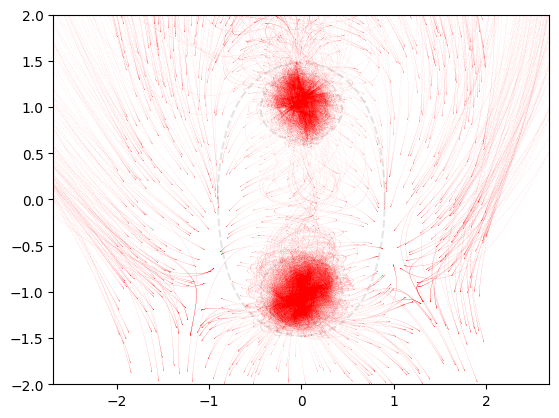

In [5]:
import advect_bubbles as adv

geometry = np.load('velocity_results/alpha04_2D_geometry.npy')
x_core, y_core, y_core_lower, x_ring, y_ring = geometry.T

fig, ax = plt.subplots()
ax.plot(x_core, y_core,'--',color='k', alpha=0.1)
ax.plot(x_core, y_core_lower,'--',color='k', alpha=0.1)
ax.plot(x_ring, y_ring, '--',color='k', alpha=0.1)

out = adv.advect_bubbles(Bubbles_df_ini, 0, 5, plot_path=True, this_ax=ax, color='r')

(-2.0, 2.0)

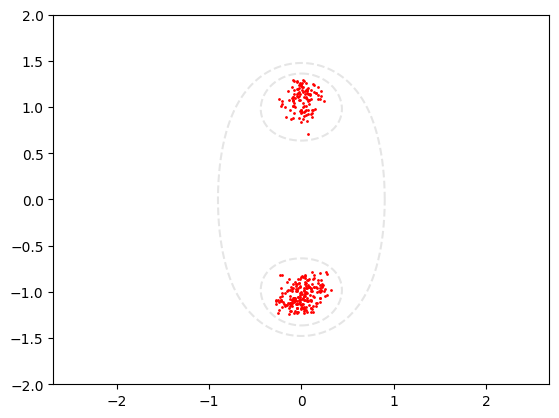

In [6]:
plt.plot(x_core, y_core,'--',color='k', alpha=0.1)
plt.plot(x_core, y_core_lower,'--',color='k', alpha=0.1)
plt.plot(x_ring, y_ring, '--',color='k', alpha=0.1)
plt.scatter(out[:, 0], out[:, 1], color='r', s=1)
plt.axis('equal')
plt.xlim(-2, 2)
plt.ylim(-2, 2)